# Table of contents
1. [Cleaning](#cleaning)
2. [Exploring to Answer Unasked Questions (EDA)](#myanswers)
3. [Answering the Asked Questions](#answers)
4. [Machine Learning](#ml)

## Cleaning the Dataframe <a name="cleaning"></a>
Before we answer the Kaggle questions, let's clean the dataframe!

In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
df1 = pd.read_csv('flavors_of_cacao.csv')
#Explore head
df1.head().T

,0,1,2,3,4
Company \n(Maker-if known),A. Morin,A. Morin,A. Morin,A. Morin,A. Morin
Specific Bean Origin\nor Bar Name,Agua Grande,Kpime,Atsane,Akata,Quilla
REF,1876,1676,1676,1680,1704
Review\nDate,2016,2015,2015,2015,2015
Cocoa\nPercent,63%,70%,70%,70%,70%
Company\nLocation,France,France,France,France,France
Rating,3.75,2.75,3,3.5,3.5
Bean\nType,,,,,
Broad Bean\nOrigin,Sao Tome,Togo,Togo,Togo,Peru


In [2]:
#Explore superficially the dataframe.
df1.head()

,Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


We can see some indexes have breaks in their names. We will rename them for ease.

In [3]:
original_colnames = df1.columns
new_colnames = ['Company', 'Specific Bean Origin or Bar Name', 'REF', 'Review Date', 'Cocoa Percent', 'Company Location', 'Rating', 'Bean Type', 'Broad Bean Origin']
df1 = df1.rename(columns=dict(zip(original_colnames, new_colnames)))
df1.head().T

,0,1,2,3,4
Company,A. Morin,A. Morin,A. Morin,A. Morin,A. Morin
Specific Bean Origin or Bar Name,Agua Grande,Kpime,Atsane,Akata,Quilla
REF,1876,1676,1676,1680,1704
Review Date,2016,2015,2015,2015,2015
Cocoa Percent,63%,70%,70%,70%,70%
Company Location,France,France,France,France,France
Rating,3.75,2.75,3,3.5,3.5
Bean Type,,,,,
Broad Bean Origin,Sao Tome,Togo,Togo,Togo,Peru


Check all columns for null values.

In [4]:
df1['Company'].isnull().value_counts()

False    1795
Name: Company, dtype: int64

In [5]:
df1['Specific Bean Origin or Bar Name'].isnull().value_counts()

False    1795
Name: Specific Bean Origin or Bar Name, dtype: int64

In [6]:
df1['REF'].isnull().value_counts()

False    1795
Name: REF, dtype: int64

In [7]:
df1['Review Date'].isnull().value_counts()

False    1795
Name: Review Date, dtype: int64

In [8]:
df1['Cocoa Percent'].isnull().value_counts()

False    1795
Name: Cocoa Percent, dtype: int64

In [9]:
df1['Company Location'].isnull().value_counts()

False    1795
Name: Company Location, dtype: int64

In [10]:
df1['Rating'].isnull(). value_counts()

False    1795
Name: Rating, dtype: int64

In [11]:
df1['Bean Type'].isnull().value_counts()

False    1794
True        1
Name: Bean Type, dtype: int64

Notice that the results for this say there is only one null value. Visual inspection shows that there are many empty cells in the column. 

In [12]:
df1['Broad Bean Origin'].isnull().value_counts()

False    1794
True        1
Name: Broad Bean Origin, dtype: int64

Notice that the results for this say there is only one null value. Visual inspection shows that there are many empty cells in the column. 

In [13]:
#Replace the missing value with the value in the corresponding Specific Bean Origin or Bar Name value instead.
df1['Broad Bean Origin'] = df1['Broad Bean Origin'].fillna(df1['Specific Bean Origin or Bar Name'])
df1['Broad Bean Origin'].isnull().value_counts()

False    1795
Name: Broad Bean Origin, dtype: int64

value_counts() says there are no more null values in the column. Visual inspection of the Broad Bean Origin column in df1 still shows empty cells.

In [14]:
#Look at most frequent Bean Type and Broad Bean Origin
df1['Bean Type'].value_counts().head(10)

                        887
Trinitario              419
Criollo                 153
Forastero                87
Forastero (Nacional)     52
Blend                    41
Criollo, Trinitario      39
Forastero (Arriba)       37
Criollo (Porcelana)      10
Trinitario, Criollo       9
Name: Bean Type, dtype: int64

Note that there are 887 values that are ' '.

In [15]:
df1['Broad Bean Origin'].value_counts().head(10)

Venezuela             214
Ecuador               193
Peru                  165
Madagascar            146
Dominican Republic    141
                       73
Nicaragua              60
Brazil                 58
Bolivia                57
Belize                 49
Name: Broad Bean Origin, dtype: int64

Note that there are 73 values that are ' '.

Now that we know that most of the columns are complete, we will explore the existing content of those columns before trying to create content in the columns that are missing values, namely the Bean Type and Broad Bean Origin columns.

In [16]:
df1['Company'].sort_values().unique()

array(['A. Morin', 'AMMA', 'Acalli', 'Adi', 'Aequare (Gianduja)',
       'Ah Cacao', "Akesson's (Pralus)", 'Alain Ducasse', 'Alexandre',
       'Altus aka Cao Artisan', 'Amano', 'Amatller (Simon Coll)',
       'Amazona', 'Ambrosia', 'Amedei', 'Anahata', 'Animas', 'Ara',
       'Arete', 'Artisan du Chocolat', 'Artisan du Chocolat (Casa Luker)',
       'Askinosie', 'Bahen & Co.', 'Bakau', 'Bar Au Chocolat',
       "Baravelli's", 'Batch', 'Beau Cacao', 'Beehive', 'Belcolade',
       'Bellflower', 'Belyzium', 'Benoit Nihant', 'Bernachon',
       'Beschle (Felchlin)', 'Bisou', 'Bittersweet Origins',
       'Black Mountain', 'Black River (A. Morin)', 'Blanxart',
       'Blue Bandana', 'Bonnat', 'Bouga Cacao (Tulicorp)', 'Bowler Man',
       "Brasstown aka It's Chocolate", 'Brazen', 'Breeze Mill', 'Bright',
       'Britarev', 'Bronx Grrl Chocolate', 'Burnt Fork Bend', 'C-Amaro',
       'Cacao Arabuco', 'Cacao Atlanta', 'Cacao Barry', 'Cacao Hunters',
       'Cacao Market', 'Cacao Prieto', 'Ca

Notice that there are two types of 'Artisan du Chocolat', 'Black River' appears to be a subset of A. Morin, there are several names that have Tulicorp bracketed but Tulicorp is not its own option. There do not appear to be any spelling mistakes so we will leave this for now.

In [17]:
df1['Specific Bean Origin or Bar Name'].sort_values().unique()

array(['"heirloom", Arriba Nacional', '100 percent', '2009 Hapa Nibby',
       ..., 'one hundred', 'single estate',
       'the lost city, gracias a dias, batch 362'], dtype=object)

Too many to list. From what is shown though, some chocolate bars come with lower case bar names, which is unlikely to be true.

In [18]:
#Check that everything in REF is a number.
df1['REF'].dtypes

dtype('int64')

In [19]:
#Check that all Review Dates are 4 digit numbers.
df1['Review Date'].dtypes

dtype('int64')

In [20]:
#Convert the Cocoa Percent values to floating decimals.
df1['Cocoa Percent'].dtypes

dtype('O')

In [21]:
df1['Cocoa Percent'] = df1['Cocoa Percent'].str.replace('%','').astype(float)/100
df1['Cocoa Percent'].dtypes

dtype('float64')

In [22]:
#Check spelling for Company Location values.
df1['Company Location'].sort_values().unique()

array(['Amsterdam', 'Argentina', 'Australia', 'Austria', 'Belgium',
       'Bolivia', 'Brazil', 'Canada', 'Chile', 'Colombia', 'Costa Rica',
       'Czech Republic', 'Denmark', 'Domincan Republic', 'Ecuador',
       'Eucador', 'Fiji', 'Finland', 'France', 'Germany', 'Ghana',
       'Grenada', 'Guatemala', 'Honduras', 'Hungary', 'Iceland', 'India',
       'Ireland', 'Israel', 'Italy', 'Japan', 'Lithuania', 'Madagascar',
       'Martinique', 'Mexico', 'Netherlands', 'New Zealand', 'Niacragua',
       'Nicaragua', 'Peru', 'Philippines', 'Poland', 'Portugal',
       'Puerto Rico', 'Russia', 'Sao Tome', 'Scotland', 'Singapore',
       'South Africa', 'South Korea', 'Spain', 'St. Lucia', 'Suriname',
       'Sweden', 'Switzerland', 'U.K.', 'U.S.A.', 'Venezuela', 'Vietnam',
       'Wales'], dtype=object)

In [23]:
#Domincan Republic (Dominican Republic), Eucador (Ecuador), Niacragua (Nicaragua) are spelt wrong. Amsterdam is the capital of the Netherlands.
df1['Company Location'] = df1['Company Location']\
.str.replace('Domincan Republic', 'Dominican Republic')\
.str.replace('Eucador', 'Ecuador')\
.str.replace('Amsterdam', 'Netherlands')\
.str.replace('Niacragua', 'Nicaragua')

df1['Company Location'].sort_values().unique()

array(['Argentina', 'Australia', 'Austria', 'Belgium', 'Bolivia',
       'Brazil', 'Canada', 'Chile', 'Colombia', 'Costa Rica',
       'Czech Republic', 'Denmark', 'Dominican Republic', 'Ecuador',
       'Fiji', 'Finland', 'France', 'Germany', 'Ghana', 'Grenada',
       'Guatemala', 'Honduras', 'Hungary', 'Iceland', 'India', 'Ireland',
       'Israel', 'Italy', 'Japan', 'Lithuania', 'Madagascar',
       'Martinique', 'Mexico', 'Netherlands', 'New Zealand', 'Nicaragua',
       'Peru', 'Philippines', 'Poland', 'Portugal', 'Puerto Rico',
       'Russia', 'Sao Tome', 'Scotland', 'Singapore', 'South Africa',
       'South Korea', 'Spain', 'St. Lucia', 'Suriname', 'Sweden',
       'Switzerland', 'U.K.', 'U.S.A.', 'Venezuela', 'Vietnam', 'Wales'],
      dtype=object)

In [24]:
#Check that all characters for Rating are numbers or decimals.
df1['Rating'].dtypes

dtype('float64')

In [25]:
#Check the spelling of Bean Type values.
df1['Bean Type'].sort_values().unique()
#We can see there are derivations of certain types, there are values of '\xa0', and values of nan. No spelling errors sighted.

array(['Amazon', 'Amazon mix', 'Amazon, ICS', 'Beniano', 'Blend',
       'Blend-Forastero,Criollo', 'CCN51', 'Criollo', 'Criollo (Amarru)',
       'Criollo (Ocumare 61)', 'Criollo (Ocumare 67)',
       'Criollo (Ocumare 77)', 'Criollo (Ocumare)', 'Criollo (Porcelana)',
       'Criollo (Wild)', 'Criollo, +', 'Criollo, Forastero',
       'Criollo, Trinitario', 'EET', 'Forastero', 'Forastero (Amelonado)',
       'Forastero (Arriba)', 'Forastero (Arriba) ASS',
       'Forastero (Arriba) ASSS', 'Forastero (Catongo)',
       'Forastero (Nacional)', 'Forastero (Parazinho)',
       'Forastero(Arriba, CCN)', 'Forastero, Trinitario', 'Matina',
       'Nacional', 'Nacional (Arriba)', 'Trinitario',
       'Trinitario (85% Criollo)', 'Trinitario (Amelonado)',
       'Trinitario (Scavina)', 'Trinitario, Criollo',
       'Trinitario, Forastero', 'Trinitario, Nacional',
       'Trinitario, TCGA', '\xa0', nan], dtype=object)

In [26]:
#Check the spelling of Broad Bean Origin values.
df1['Broad Bean Origin'].sort_values().unique()

array(['Africa, Carribean, C. Am.', 'Australia', 'Belize', 'Bolivia',
       'Brazil', 'Burma', 'Cameroon', 'Carribean',
       'Carribean(DR/Jam/Tri)', 'Central and S. America', 'Colombia',
       'Colombia, Ecuador', 'Congo', 'Cost Rica, Ven', 'Costa Rica',
       'Cuba', 'DR, Ecuador, Peru', 'Dom. Rep., Madagascar',
       'Domincan Republic', 'Dominican Rep., Bali', 'Dominican Republic',
       'Ecuador', 'Ecuador, Costa Rica', 'Ecuador, Mad., PNG',
       'El Salvador', 'Fiji', 'Gabon', 'Ghana', 'Ghana & Madagascar',
       'Ghana, Domin. Rep', 'Ghana, Panama, Ecuador',
       'Gre., PNG, Haw., Haiti, Mad', 'Grenada',
       'Guat., D.R., Peru, Mad., PNG', 'Guatemala', 'Haiti', 'Hawaii',
       'Honduras', 'India', 'Indonesia', 'Indonesia, Ghana',
       'Ivory Coast', 'Jamaica', 'Liberia', 'Mad., Java, PNG',
       'Madagascar', 'Madagascar & Ecuador', 'Malaysia', 'Martinique',
       'Mexico', 'Nicaragua', 'Nigeria', 'PNG, Vanuatu, Mad', 'Panama',
       'Papua New Guinea', 'Per

In [27]:
df1[df1['Broad Bean Origin'].str.len()==1]['Specific Bean Origin or Bar Name'].unique()

array(['Nine', 'Toscano Black', 'Houseblend', 'Nature', 'Organic Dark',
       'One Hundred', 'Blend', 'Lago di Como, Blu', 'Blend No. 1',
       'Philly Blend, 5 plantations', 'Kendari', 'Tarakan', 'Maragda',
       'Sensations Intense', 'Zorzal Reserva, 2015 H., Kerchner', 'Noir',
       'Ilblend', 'Red Vanilla', 'Supremo- SF', 'Dark',
       'Epique, Blend No. 49', 'Coucher du Soleil', 'Lever du Soleil',
       'Onyx', 'Nocturne', 'Complexite', 'Special Maker Reserve',
       'Quetzalcoatl', 'Tsaranta', 'Semisweet', 'Campesino w/ nibs',
       'Trinitario', 'Downtown London', 'Africa meets Latina', 'Amazonas',
       'one hundred', 'Kuruba', 'Orinoco', 'Excellence (US Version)',
       'Cacao Nib Crunch', 'Brooklyn Blend', 'Carre Amer',
       'Carre Grand Noir', 'Noir Infini',
       'Grand Cru Blend No.1, 5 yr. Anniversary Ed', 'Signature Blend',
       'Raw', 'Mid Mountain, 2014', '100 percent', 'Latino', 'Nibby',
       'Extra Dark', 'Bittersweet', 'Wasatch', "Chef's Blend",
   

We can see that some of our responses are blends or blend types. This may helpful for determining the missing values in the Bean Type column.

In [28]:
# To check the appearance of the df after cleaning.
df1.head()

,Company,Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
0,A. Morin,Agua Grande,1876,2016,0.63,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,0.70,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,0.70,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,0.70,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,0.70,France,3.50,,Peru


## Answering Unasked Questions (EDA) <a name="myanswers"></a>
We are done with cleaning the dataframe. We will now explore to see if we can interesting facts before answering the questions on the Kaggle page. Perhaps this will help guide our approach in answering those questions.

In [29]:
df1[df1['Rating']==5.00]

,Company,Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
78,Amedei,Chuao,111,2007,0.7,Italy,5.0,Trinitario,Venezuela
86,Amedei,Toscano Black,40,2006,0.7,Italy,5.0,Blend,


Some similarities we can see are the Companies are the same. The Cocoa Percent values are the same. The Company's Location is the same. Let's see what is happening when check for the behaviour of each similarity in the broader df1 in order from left ot right.

In [30]:
df1[df1['Company']=='Amedei']

,Company,Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
75,Amedei,"Piura, Blanco de Criollo",979,2012,0.70,Italy,3.75,,Peru
76,Amedei,Porcelana,111,2007,0.70,Italy,4.00,Criollo (Porcelana),Venezuela
77,Amedei,Nine,111,2007,0.75,Italy,4.00,Blend,
78,Amedei,Chuao,111,2007,0.70,Italy,5.00,Trinitario,Venezuela
79,Amedei,Ecuador,123,2007,0.70,Italy,3.00,Trinitario,Ecuador
80,Amedei,Jamaica,123,2007,0.70,Italy,3.00,Trinitario,Jamaica
81,Amedei,Grenada,123,2007,0.70,Italy,3.50,Trinitario,Grenada
82,Amedei,Venezuela,123,2007,0.70,Italy,3.75,Trinitario (85% Criollo),Venezuela
83,Amedei,Madagascar,123,2007,0.70,Italy,4.00,Trinitario (85% Criollo),Madagascar
84,Amedei,Trinidad,129,2007,0.70,Italy,3.50,Trinitario,Trinidad


We can see that Company is not a really good indicator of how popular a chocolate bar is going to be. 

In [31]:
df1[df1['Cocoa Percent']==0.7].describe()

,REF,Review Date,Cocoa Percent,Rating
count,672.000000,672.000000,6.720000e+02,672.000000
mean,1161.764881,2012.977679,7.000000e-01,3.276042
std,532.368519,2.717900,7.666245e-15,0.452957
min,15.000000,2006.000000,7.000000e-01,1.000000
25%,792.000000,2011.750000,7.000000e-01,3.000000
50%,1251.000000,2014.000000,7.000000e-01,3.250000
75%,1614.000000,2015.000000,7.000000e-01,3.500000
max,1952.000000,2017.000000,7.000000e-01,5.000000


In [32]:
df1[(df1['Broad Bean Origin'] == 'Venezuela') & (df1['Company']=='Amedei')]

,Company,Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
76,Amedei,Porcelana,111,2007,0.7,Italy,4.00,Criollo (Porcelana),Venezuela
78,Amedei,Chuao,111,2007,0.7,Italy,5.00,Trinitario,Venezuela
82,Amedei,Venezuela,123,2007,0.7,Italy,3.75,Trinitario (85% Criollo),Venezuela


The ratings for a Cooa Percent of 0.7 really run the gamut. The minimum value is 1.0 and the maximum is 5.0. So we can see that neither Company name nor Cocoa Percent gives us a good indicator of when a chocolate bar will be more popular even when in conjunction with one another. Amedei produces two good chocolate bars in the same year, 2007. It seems like they tried to compbine the bean types for the third chocolate bar, indexed 82, but that did worse than both of them. However Amedei is the only company to create 5.0 rating chocolates in the dataset so we'll keep that as a point in their favour. 

In [33]:
q3 = df1[~df1['Broad Bean Origin'].str.contains(",")]
q3.shape

(1755, 9)

Text(0.5,1,'Boxplot, Rating for countries')

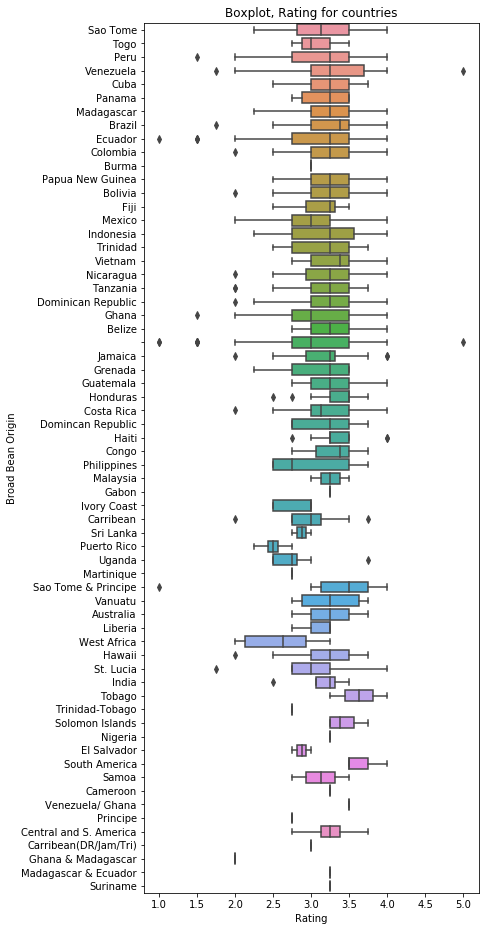

In [34]:
fig, ax = plt.subplots(figsize=[6, 16])
sns.boxplot(
    data=q3,
    y='Broad Bean Origin',
    x='Rating'
)
ax.set_title('Boxplot, Rating for countries')

Below is a chloropleth world map with the Broad Bean Origin countries coloured by the mean of their rankings. There is also the HTML link to the map in the github folder for this exploration.

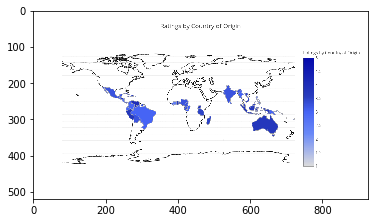

In [35]:
import matplotlib.image as mpimg

img = mpimg.imread('Plot 5.png')
plt.imshow(img)
plt.figure(figsize=[20,10])
plt.show()

We can see beans mostly originate from the Southern Hemisphere. The higher rated beans come from Australia and some western regions of South America. We can cross-reference this map with a map of the world's oceans to dee which water sources are responsible for the growth of cocoa beans in those coastal countries.

## Answering Asked Questions <a name="answers"></a>
Now that we have our own mini-exploration of the cleaned dataframe, let's attempt to answer the questions from the provided Kaggle problems.

Where are the best cocoa beans grown?

Let's look at the following:

In [36]:
df1[df1['Rating']>=4.0].groupby('Broad Bean Origin').max().reset_index().head()

,Broad Bean Origin,Company,Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type
0,Belize,Castronovo,"Maya Mtn, Batch 454, Heirloom",1724,2016,0.72,U.S.A.,4.0,Trinitario
1,Bolivia,Rogue,"Wild Beni, Lower Rio Beni, Tranquilidad, 2015",1744,2016,0.75,U.S.A.,4.0,
2,Brazil,L.A. Burdick (Felchlin),"Monte Alegre, 3 diff. plantations",1339,2014,0.75,U.S.A.,4.0,
3,Colombia,Willie's Cacao,"Sierra Nevada, Tutu Iku",1848,2016,0.70,U.K.,4.0,
4,Costa Rica,Fruition,"Coto Brus, Terciopelo",1908,2016,0.74,U.S.A.,4.0,


The countries are so varied that graphing wouldn't be very helpful. Most of the bars have a rating of 4.0 anyway. So we will review the results by table instead.

In [37]:
q1 = df1.groupby('Broad Bean Origin').mean().reset_index()
q1.head(10)

,Broad Bean Origin,REF,Review Date,Cocoa Percent,Rating
0,"Africa, Carribean, C. Am.",1121.000000,2013.000000,0.740000,2.750000
1,Australia,1434.333333,2014.000000,0.690000,3.250000
2,Belize,1414.897959,2014.387755,0.734490,3.234694
3,Bolivia,1152.719298,2013.052632,0.717018,3.197368
4,Brazil,1082.482759,2012.568966,0.711379,3.284483
5,Burma,1015.000000,2013.000000,0.700000,3.000000
6,Cameroon,1658.000000,2015.000000,0.700000,3.250000
7,Carribean,455.250000,2009.125000,0.762500,2.968750
8,Carribean(DR/Jam/Tri),117.000000,2007.000000,0.720000,3.000000
9,Central and S. America,933.500000,2012.250000,0.780000,3.250000


In [38]:
q1[q1['Rating'] >= 4.0]

,Broad Bean Origin,REF,Review Date,Cocoa Percent,Rating
17,"Dom. Rep., Madagascar",867.0,2012.0,0.70,4.0
31,"Gre., PNG, Haw., Haiti, Mad",867.0,2012.0,0.70,4.0
33,"Guat., D.R., Peru, Mad., PNG",1077.0,2013.0,0.88,4.0
58,"Peru, Dom. Rep",1081.0,2013.0,0.67,4.0
84,"Ven, Bolivia, D.R.",676.0,2011.0,0.70,4.0
94,"Venezuela, Java",111.0,2007.0,0.70,4.0


It seems like the best cocoa beans are blends grown from a combination of Dominican Republic, Madagascar, Grenada, Papua New Guinea, Hawaii, Haiti, Guatemala, Peru, Venezuela, Bolivia, and Java.

What companies produce the highest rated bars?

Let's look at Company Location along with the Rating of the bars.

In [39]:
q2 = df1[['Company', 'Company Location', 'Rating', 'Review Date']]
q2.head()

,Company,Company Location,Rating,Review Date
0,A. Morin,France,3.75,2016
1,A. Morin,France,2.75,2015
2,A. Morin,France,3.00,2015
3,A. Morin,France,3.50,2015
4,A. Morin,France,3.50,2015


In [40]:
q2.groupby('Rating').max().reset_index()

,Rating,Company,Company Location,Review Date
0,1.00,Neuhaus (Callebaut),Sao Tome,2008
1,1.50,Valrhona,U.S.A.,2012
2,1.75,Hotel Chocolat,U.K.,2013
3,2.00,Vintage Plantations (Tulicorp),U.S.A.,2016
4,2.25,Willie's Cacao,U.S.A.,2016
5,2.50,twenty-four blackbirds,Venezuela,2017
6,2.75,twenty-four blackbirds,Wales,2017
7,3.00,organicfair,Vietnam,2017
8,3.25,twenty-four blackbirds,Vietnam,2017
9,3.50,twenty-four blackbirds,Vietnam,2017


Amedei. Nothing comes close. There is no 4.50 rating. However, since the Amedei rating is more than a decade old, it makes more sense to say the the higher ranking bars are made by Woodblock in the U.S.A. more recently.

What's the relation between the cocoa solids percentage and rating? We will try a swarm plot and a boxplot for answers.

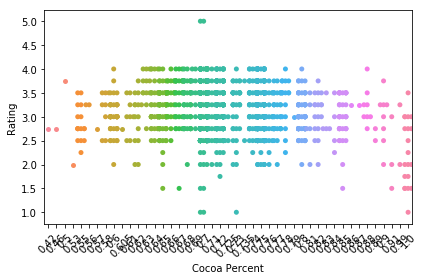

In [41]:
sns.swarmplot(x=df1['Cocoa Percent'], y=df1['Rating'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Text(0.5,1,'Boxplot, Rating for countries')

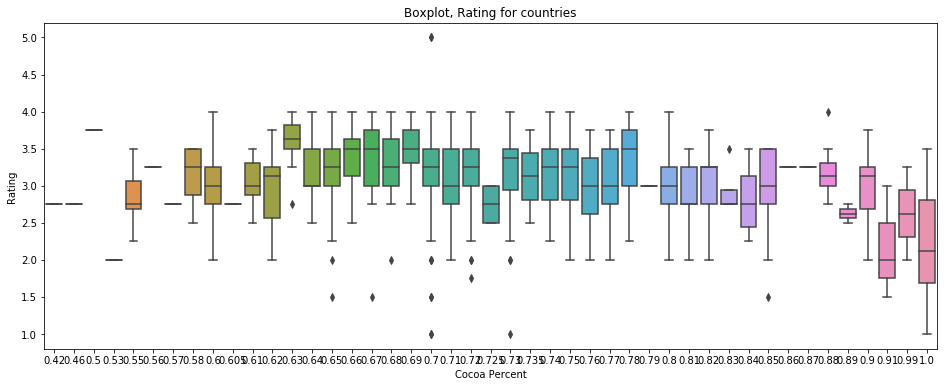

In [42]:
fig, ax = plt.subplots(figsize=[16, 6])
sns.boxplot(
    data=df1,
    y='Rating',
    x='Cocoa Percent'
)
ax.set_title('Boxplot, Rating for countries')

There are no obvious winners in which Cocoa Percent has a consistently higher rating. There are two instances of a 5.0 Rating and they both occur with the Cocoa Percent is 0.7 (70%). The boxplot marks those 5.0 points as outliers. Most Cocoa Percents will land a rating from 2.0 to 4.0 regardless. There seem to be a higher quantity of ratings from 0.6 to 0.78 on the Cocoa Percent scale but that range is also where most of the ratings 2.0 or less are. There is no obvious trend for which Cocoa Percent has the better rating. 0.7 Cocoa Percent had two 5.0 ratings but it also had two 1.0 ratings. There are no consistent findings.

## Machine Learning <a name="ml"></a>

In [43]:
X = df1.drop('Rating', axis = 1)
y = df1['Rating']

X.head()

,Company,Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Bean Type,Broad Bean Origin
0,A. Morin,Agua Grande,1876,2016,0.63,France,,Sao Tome
1,A. Morin,Kpime,1676,2015,0.70,France,,Togo
2,A. Morin,Atsane,1676,2015,0.70,France,,Togo
3,A. Morin,Akata,1680,2015,0.70,France,,Togo
4,A. Morin,Quilla,1704,2015,0.70,France,,Peru


In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7)

X_train.head()

,Company,Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Bean Type,Broad Bean Origin
1695,Valrhona,Abinao,153,2007,0.85,France,Forastero,West Africa
1539,Soma,Eastern Promises,967,2012,0.70,Canada,Blend,"Mad., Java, PNG"
1338,Pralus,"Djakarta, Java and Ghana",99,2006,0.75,France,"Criollo, Forastero","Indonesia, Ghana"
142,Askinosie,Xoconusco,141,2007,0.75,U.S.A.,Trinitario,Mexico
228,Bonnat,"Cusco, Cacao Cusco",629,2011,0.75,France,,Peru


We cannot use a 'bag of words' model since we do not have a consistent vocabulary. 'Amedei' does not always mean 5.0 rating and neither does 'Italy'. We cannot supply positive or negative consistent connotations with the strings in the dataframe. Therefore, we will remove the strings from the dataframe that we will use to predict the ratings of the chocolate bars. 

In [45]:
del X_train['Specific Bean Origin or Bar Name']
del X_test['Specific Bean Origin or Bar Name']

del X_train['Bean Type']
del X_test['Bean Type']

del X_train['Broad Bean Origin']
del X_test['Broad Bean Origin']

del X_train['Company']
del X_test['Company']

del X_train['Company Location']
del X_test['Company Location']

X_train.head()

,REF,Review Date,Cocoa Percent
1695,153,2007,0.85
1539,967,2012,0.70
1338,99,2006,0.75
142,141,2007,0.75
228,629,2011,0.75


In [51]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import numpy as np

#parameter combinations to try
param_grid = {'n_estimators': [10, 30, 50, 90], 
              'max_depth': [5, 10, 20, None]
             }

regr = RandomForestRegressor()

#fitting the model to each combination in the grid
model = GridSearchCV(regr, param_grid)
#fining the best parameters based on the search grid
model.fit(np.matrix(X_train), y_train)

#pulling the fitted model on the best settings so we can see the variable importances
regr = model.best_estimator_

print(model.best_score_)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.09085543810121786
0.1860847083912155
0.10721547080428839


We can see that the accuracy of our test set is slightly more than half of the accuracy of the RandomForestRegressor() on the training set. Since the best score was very close to the accuracy of the test set, I am pleased with the results of the RandomForestRegressor on the data and predicting chocolate bar Rating values. 